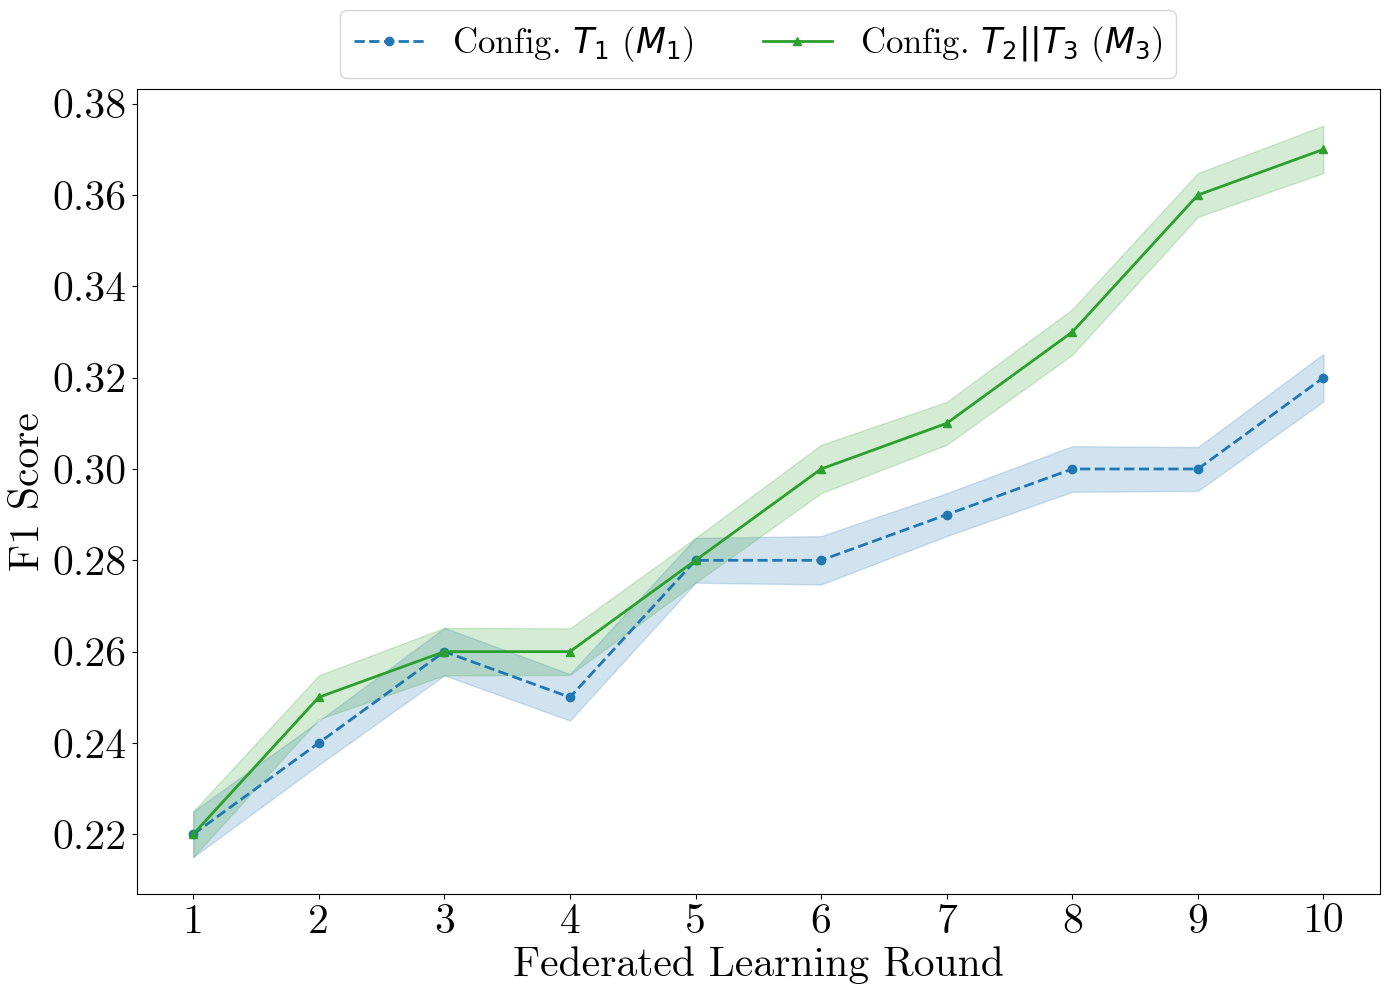

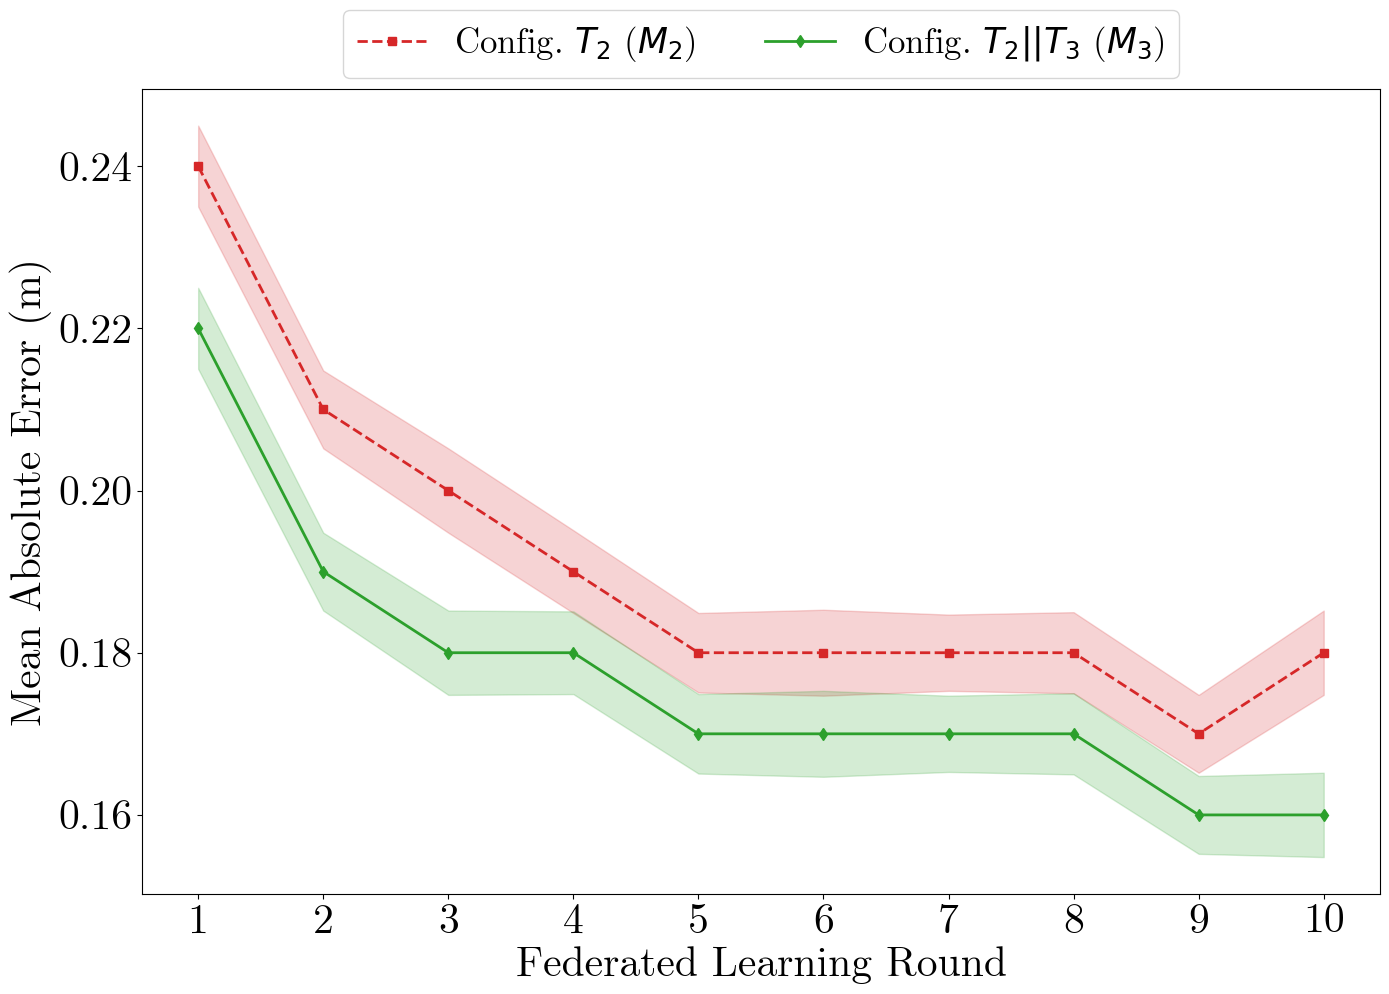

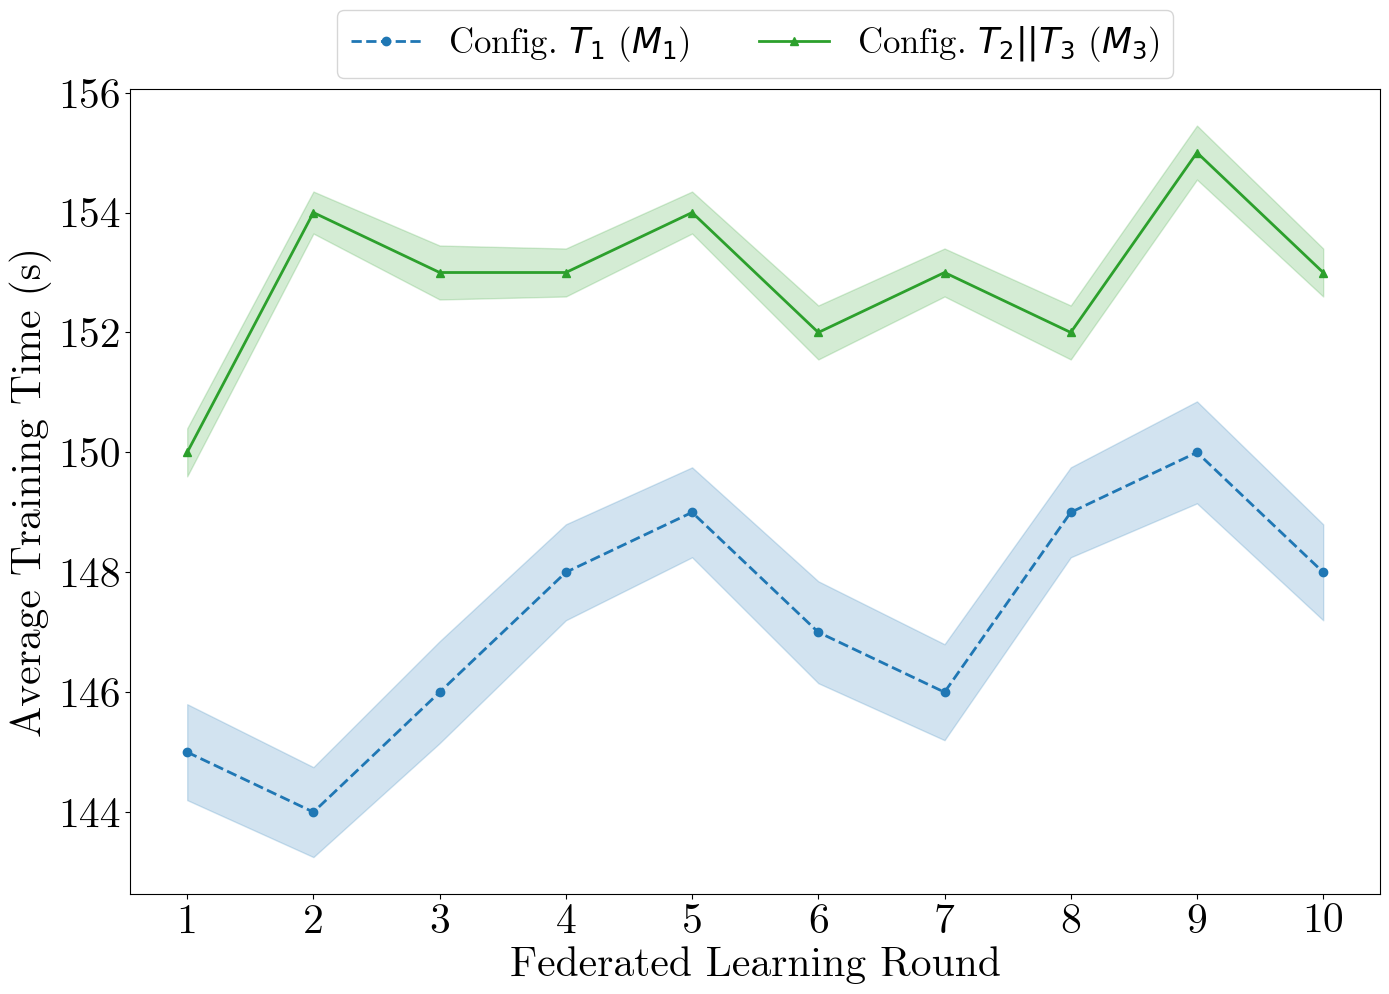

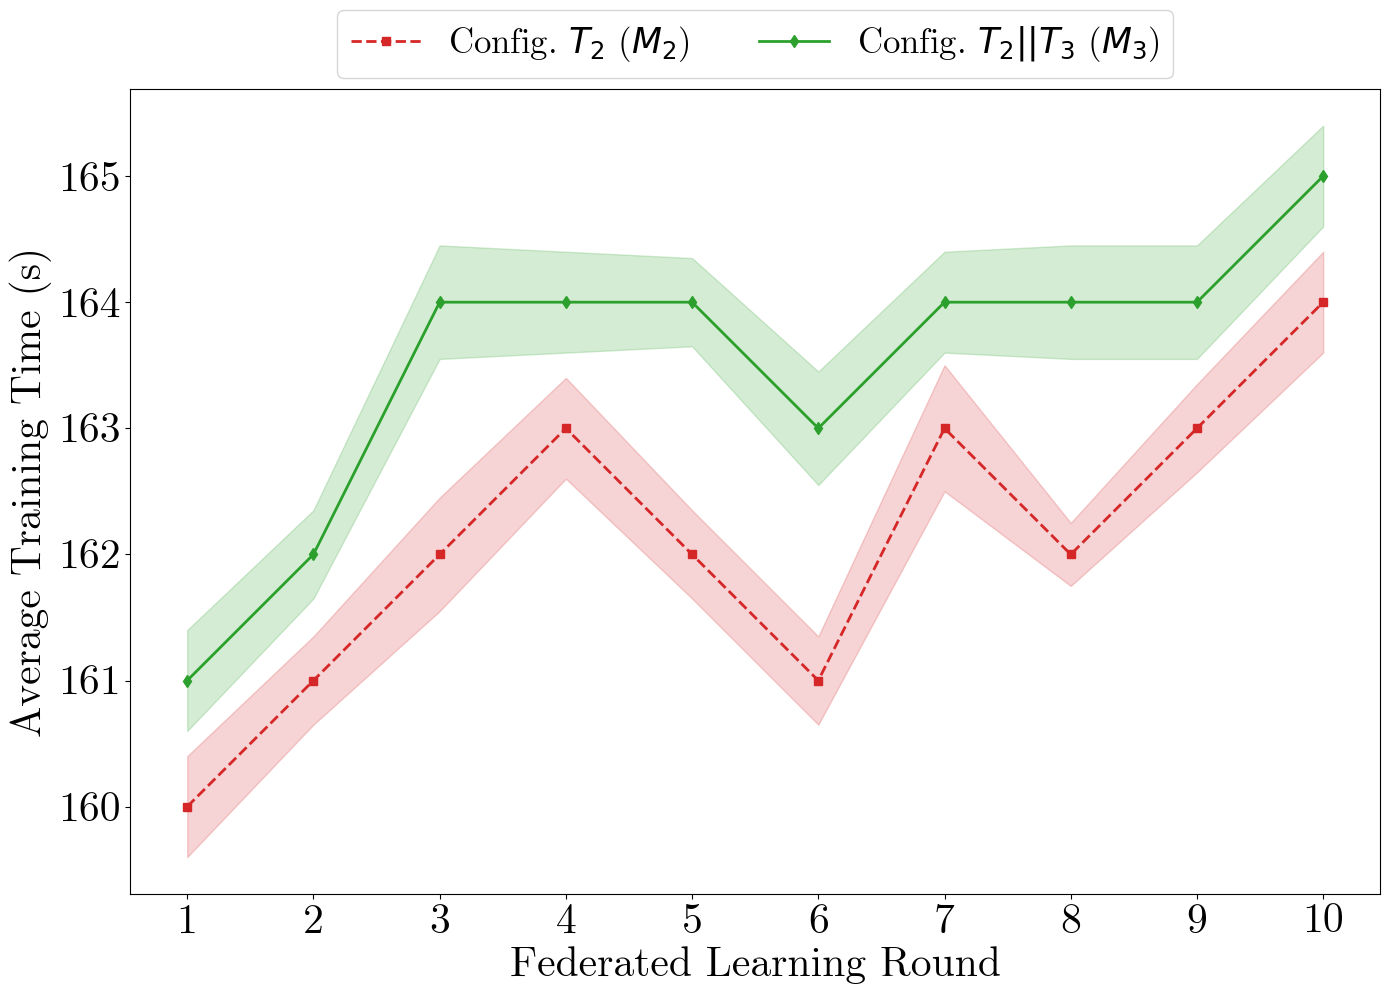

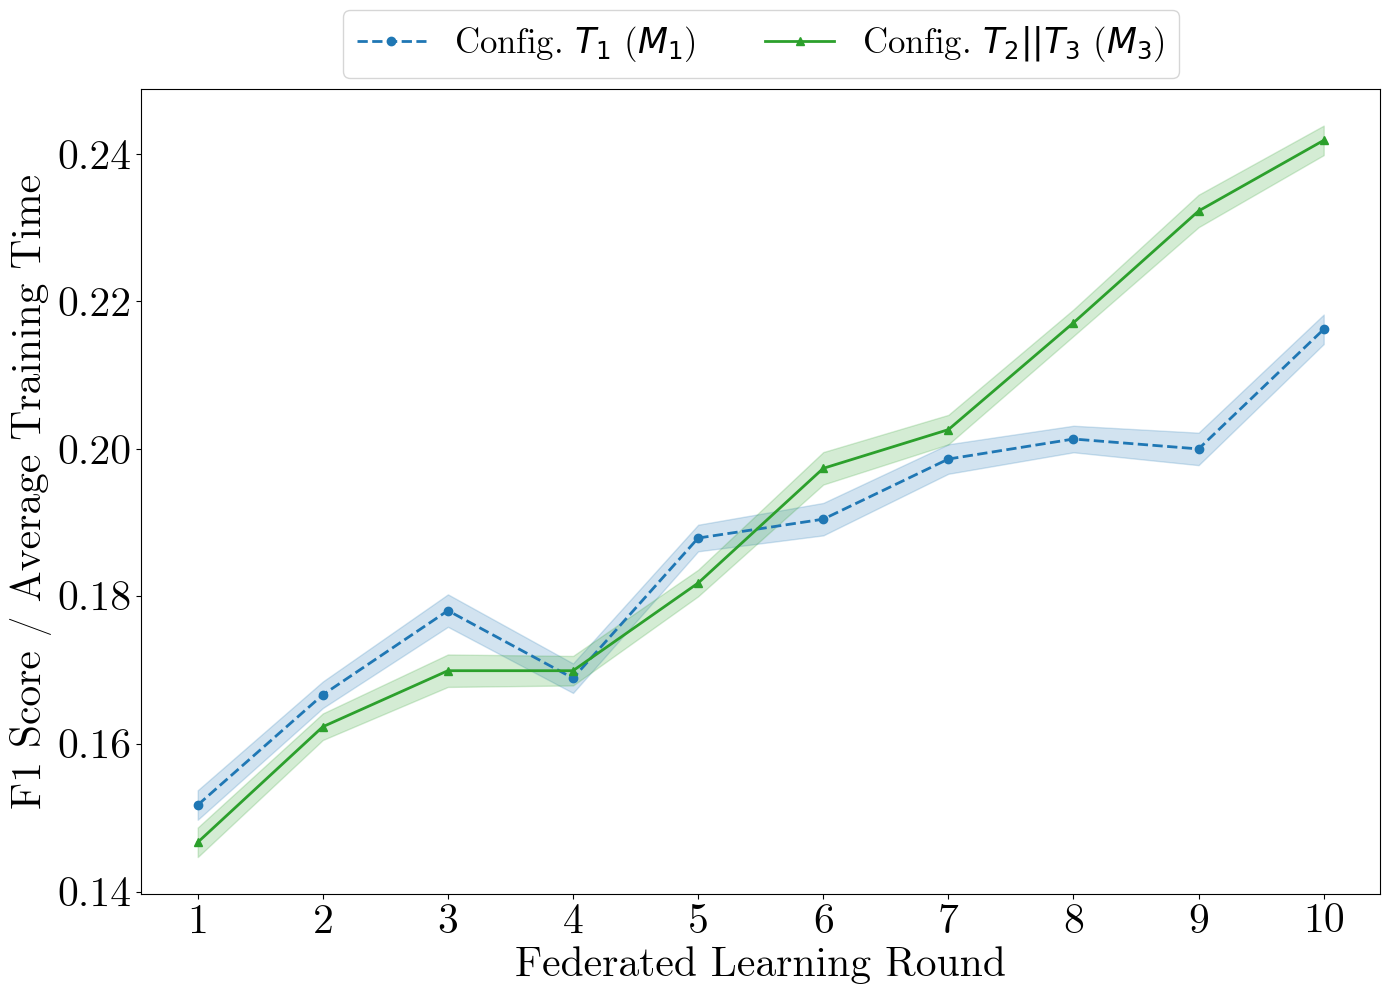

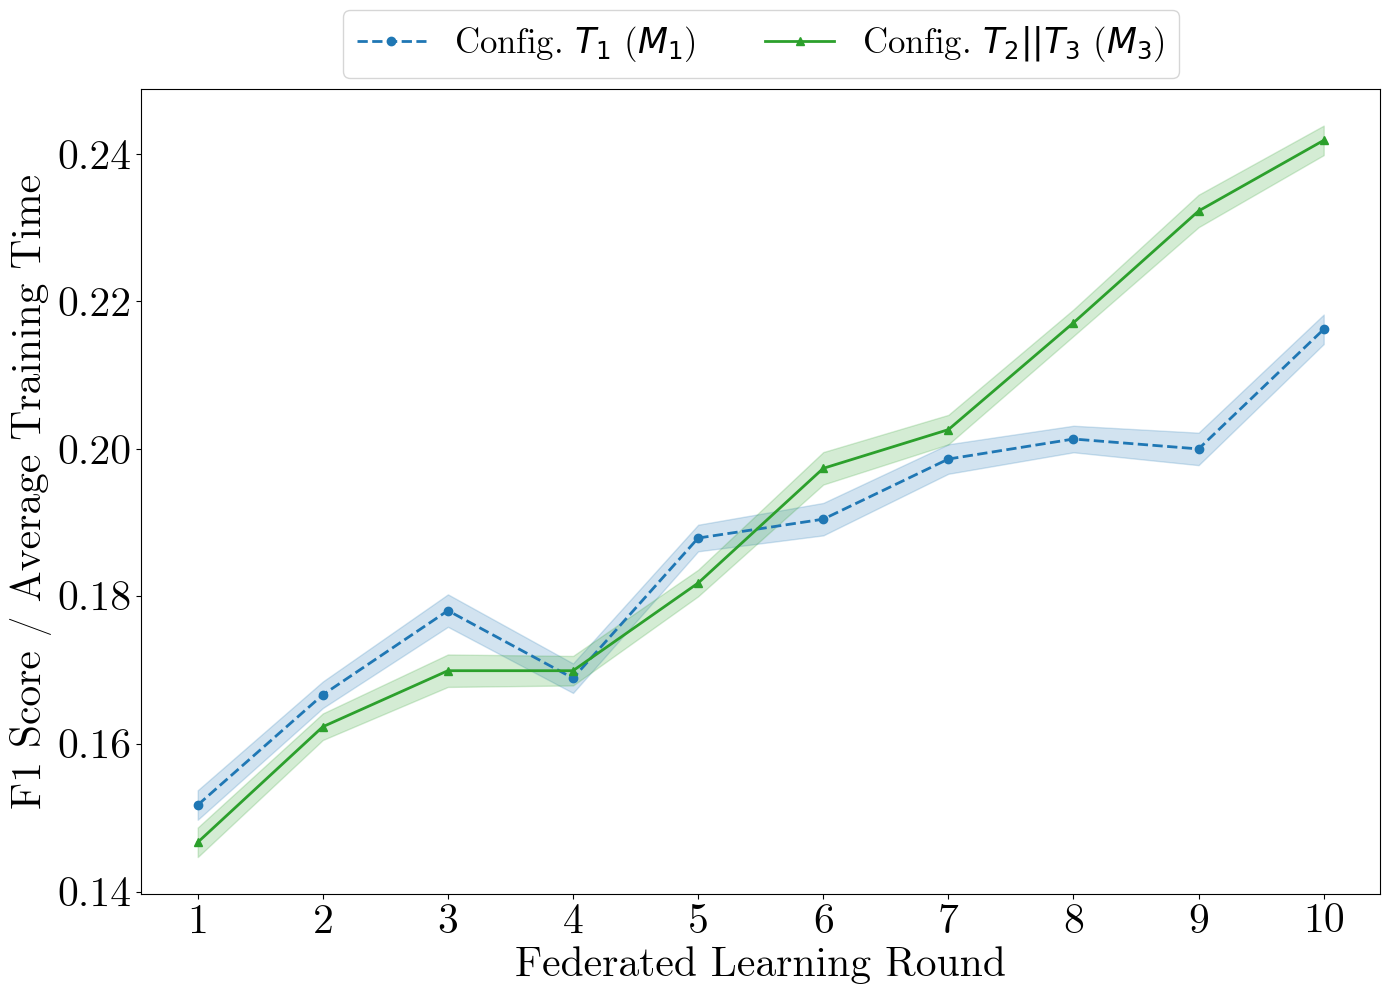

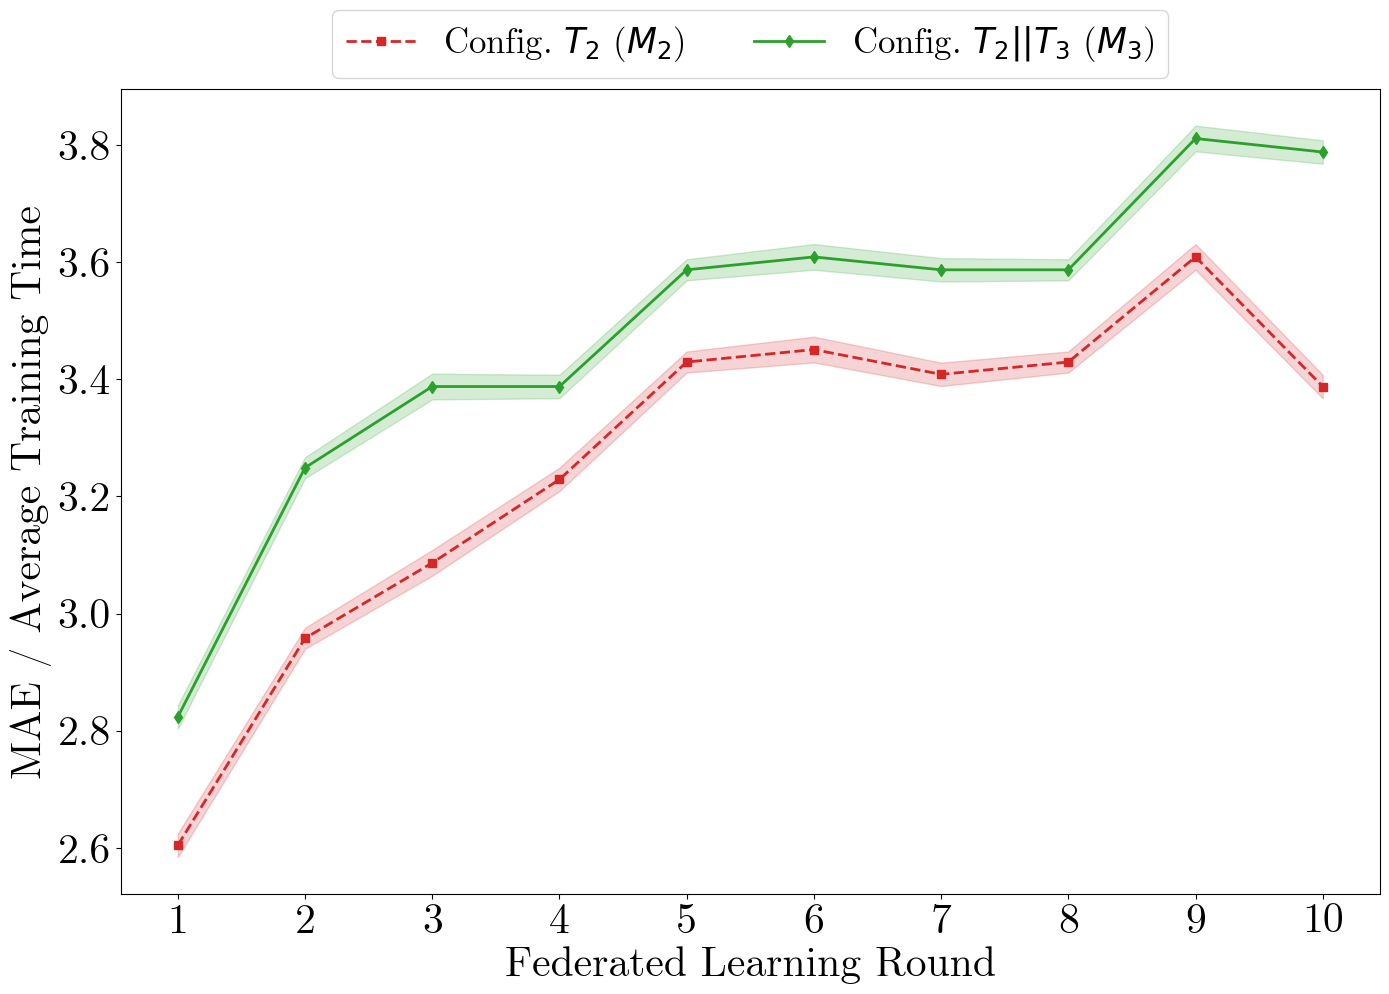

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Impostazioni iniziali
plt.rcParams['font.family'] = 'CMU Serif'
rounds = np.arange(1, 11)

# Define consistent colors for all plots
COLOR_M1 = "#1f77b4"  # blue for m1
COLOR_M2 = "#d62728"  # red for m2
COLOR_M3 = "#2ca02c"  # green for m3

# ------------------------------
# Updated data for M1
accuracy_m1 = [0.22, 0.24, 0.26, 0.25, 0.28, 0.28, 0.29, 0.30, 0.30, 0.32]
total_training_time_m1 = [145, 144, 146, 148, 149, 147, 146, 149, 150, 148]

# Updated data for M2
mae_m2 = [0.24, 0.21, 0.20, 0.19, 0.18, 0.18, 0.18, 0.18, 0.17, 0.18]
total_training_time_m2 = [160, 161, 162, 163, 162, 161, 163, 162, 163, 164]

# Updated data for M3
accuracy_m3_t1 = [0.22, 0.25, 0.26, 0.26, 0.28, 0.30, 0.31, 0.33, 0.36, 0.37]
total_training_time_m3_t1 = [150, 154, 153, 153, 154, 152, 153, 152, 155, 153]
mae_m3_t2 = [0.22, 0.19, 0.18, 0.18, 0.17, 0.17, 0.17, 0.17, 0.16, 0.16]
total_training_time_m3_t2 = [161, 162, 164, 164, 164, 163, 164, 164, 164, 165]

# Updated confidence intervals to be consistent with F1 Score plot
ci_m1_f1 = [0.005, 0.0048, 0.0052, 0.0051, 0.0049, 0.0053, 0.0047, 0.005, 0.0048, 0.0052]
ci_m3_t1_f1 = [0.005, 0.0048, 0.0052, 0.0051, 0.0049, 0.0053, 0.0047, 0.005, 0.0048, 0.0052]
ci_m2_mae = [0.005, 0.0048, 0.0052, 0.0051, 0.0049, 0.0053, 0.0047, 0.005, 0.0048, 0.0052]
ci_m3_t2_mae = [0.005, 0.0048, 0.0052, 0.0051, 0.0049, 0.0053, 0.0047, 0.005, 0.0048, 0.0052]
ci_m1_tt = [0.8, 0.75, 0.85, 0.8, 0.75, 0.85, 0.8, 0.75, 0.85, 0.8]
ci_m2_tt = [0.4, 0.35, 0.45, 0.4, 0.35, 0.35, 0.5, 0.25, 0.35, 0.4]
ci_m3_tt = [0.4, 0.35, 0.45, 0.4, 0.35, 0.45, 0.4, 0.45, 0.45, 0.4]

# Calcoli delle metriche di efficienza
# Calcoli delle metriche di efficienza (questi sono corretti)
f1_over_training_m1 = [(a / t) * 100 for a, t in zip(accuracy_m1, total_training_time_m1)]
f1_over_training_m3_t1 = [(a / t) * 100 for a, t in zip(accuracy_m3_t1, total_training_time_m3_t1)]
mae_over_training_m2 = [(1 / (m * t)) * 100 for m, t in zip(mae_m2, total_training_time_m2)]
mae_over_training_m3_t2 = [(1 / (m * t)) * 100 for m, t in zip(mae_m3_t2, total_training_time_m3_t2)]

# Intervalli di confidenza con valori pi√π piccoli
ci_eff_m1 = [0.002, 0.0018, 0.0022, 0.002, 0.0018, 0.0022, 0.002, 0.0018, 0.0022, 0.002]
ci_eff_m3_t1 = [0.002, 0.0018, 0.0022, 0.002, 0.0018, 0.0022, 0.002, 0.0018, 0.0022, 0.002]
ci_eff_m2 = [0.02, 0.018, 0.022, 0.02, 0.018, 0.022, 0.02, 0.018, 0.022, 0.02]
ci_eff_m3_t2 = [0.02, 0.018, 0.022, 0.02, 0.018, 0.022, 0.02, 0.018, 0.022, 0.02] 


# ------------------------------
# Grafico 1: F1 Score vs FL Round (m1 e m3_t1)
colors1 = [COLOR_M1, COLOR_M3]
labels1 = [r'Config. $T_{1}$ ($M_{1}$)', r'Config. $T_{2} || T_{3}$ ($M_{3}$)']
markers1 = ['o', '^']

fig, ax = plt.subplots(figsize=(14, 10))
# M1 con linea tratteggiata
ax.plot(rounds, accuracy_m1, color=colors1[0], label=labels1[0], marker=markers1[0], linewidth=2, linestyle='--')
ax.fill_between(rounds, 
                [d - c for d, c in zip(accuracy_m1, ci_m1_f1)],
                [d + c for d, c in zip(accuracy_m1, ci_m1_f1)],
                color=colors1[0], alpha=0.2)
# M3 con linea continua
ax.plot(rounds, accuracy_m3_t1, color=colors1[1], label=labels1[1], marker=markers1[1], linewidth=2, linestyle='-')
ax.fill_between(rounds, 
                [d - c for d, c in zip(accuracy_m3_t1, ci_m3_t1_f1)],
                [d + c for d, c in zip(accuracy_m3_t1, ci_m3_t1_f1)],
                color=colors1[1], alpha=0.2)

ax.set_xlabel('Federated Learning Round', fontsize=30)
ax.set_ylabel('F1 Score', fontsize=30)
ax.tick_params(axis='both', labelsize=30)
ax.set_xticks(rounds)
ax.legend(fontsize=25, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=3)
plt.tight_layout()
plt.savefig('F1_Score.pdf', bbox_inches='tight')
plt.show()

# ------------------------------
# Grafico 2: MAE vs FL Round (m2 e m3_t2)
colors2 = [COLOR_M2, COLOR_M3]
labels2 = [r'Config. $T_{2}$ ($M_{2}$)', r'Config. $T_{2} || T_{3}$ ($M_{3}$)']
markers2 = ['s', 'd']

fig, ax = plt.subplots(figsize=(14, 10))
# M2 con linea tratteggiata
ax.plot(rounds, mae_m2, color=colors2[0], label=labels2[0], marker=markers2[0], linewidth=2, linestyle='--')
ax.fill_between(rounds,
                [d - c for d, c in zip(mae_m2, ci_m2_mae)],
                [d + c for d, c in zip(mae_m2, ci_m2_mae)],
                color=colors2[0], alpha=0.2)
# M3 con linea continua
ax.plot(rounds, mae_m3_t2, color=colors2[1], label=labels2[1], marker=markers2[1], linewidth=2, linestyle='-')
ax.fill_between(rounds,
                [d - c for d, c in zip(mae_m3_t2, ci_m3_t2_mae)],
                [d + c for d, c in zip(mae_m3_t2, ci_m3_t2_mae)],
                color=colors2[1], alpha=0.2)

ax.set_xlabel('Federated Learning Round', fontsize=30)
ax.set_ylabel('Mean Absolute Error (m)', fontsize=30)
ax.tick_params(axis='both', labelsize=30)
ax.set_xticks(rounds)
ax.legend(fontsize=25, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)
plt.tight_layout()
plt.savefig('MAE.pdf', bbox_inches='tight')
plt.show()

# ------------------------------
# Grafico 3: Average Training Time vs FL Round (m1 e m3)
labels_at1 = [r'Config. $T_{1}$ ($M_{1}$)', r'Config. $T_{2} || T_{3}$ ($M_{3}$)']
colors_at1 = [COLOR_M1, COLOR_M3]
markers_at1 = ['o', '^']

fig, ax = plt.subplots(figsize=(14, 10))
# M1 con linea tratteggiata
ax.plot(rounds, total_training_time_m1, color=colors_at1[0], label=labels_at1[0], marker=markers_at1[0], linewidth=2, linestyle='--')
ax.fill_between(rounds,
                [d - c for d, c in zip(total_training_time_m1, ci_m1_tt)],
                [d + c for d, c in zip(total_training_time_m1, ci_m1_tt)],
                color=colors_at1[0], alpha=0.2)
# M3 con linea continua
ax.plot(rounds, total_training_time_m3_t1, color=colors_at1[1], label=labels_at1[1], marker=markers_at1[1], linewidth=2, linestyle='-')
ax.fill_between(rounds,
                [d - c for d, c in zip(total_training_time_m3_t1, ci_m3_tt)],
                [d + c for d, c in zip(total_training_time_m3_t1, ci_m3_tt)],
                color=colors_at1[1], alpha=0.2)

ax.set_xlabel('Federated Learning Round', fontsize=30)
ax.set_ylabel('Average Training Time (s)', fontsize=30)
ax.tick_params(axis='both', labelsize=30)
ax.set_xticks(rounds)
ax.legend(fontsize=25, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)
plt.tight_layout()
plt.savefig('TT_M1_M3.pdf', bbox_inches='tight')
plt.show()

# ------------------------------
# Grafico 4: Average Training Time vs FL Round (m2 e m3)
labels_at2 = [r'Config. $T_{2}$ ($M_{2}$)', r'Config. $T_{2} || T_{3}$ ($M_{3}$)']
colors_at2 = [COLOR_M2, COLOR_M3]
markers_at2 = ['s', 'd']

fig, ax = plt.subplots(figsize=(14, 10))
# M2 con linea tratteggiata
ax.plot(rounds, total_training_time_m2, color=colors_at2[0], label=labels_at2[0], marker=markers_at2[0], linewidth=2, linestyle='--')
ax.fill_between(rounds,
                [d - c for d, c in zip(total_training_time_m2, ci_m2_tt)],
                [d + c for d, c in zip(total_training_time_m2, ci_m2_tt)],
                color=colors_at2[0], alpha=0.2)
# M3 con linea continua
ax.plot(rounds, total_training_time_m3_t2, color=colors_at2[1], label=labels_at2[1], marker=markers_at2[1], linewidth=2, linestyle='-')
ax.fill_between(rounds,
                [d - c for d, c in zip(total_training_time_m3_t2, ci_m3_tt)],
                [d + c for d, c in zip(total_training_time_m3_t2, ci_m3_tt)],
                color=colors_at2[1], alpha=0.2)

ax.set_xlabel('Federated Learning Round', fontsize=30)
ax.set_ylabel('Average Training Time (s)', fontsize=30)
ax.tick_params(axis='both', labelsize=30)
ax.set_xticks(rounds)
ax.legend(fontsize=25, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)
plt.tight_layout()
plt.savefig('TT_M2_M3.pdf', bbox_inches='tight')
plt.show()

# ------------------------------
# Grafico 5: F1 Score / Average Training Time (m1 e m3_t1)
fig, ax = plt.subplots(figsize=(14, 10))
# M1 con linea tratteggiata
ax.plot(rounds, f1_over_training_m1, color=colors1[0], label=labels1[0], marker=markers1[0], linewidth=2, linestyle='--')
ax.fill_between(rounds,
                [d - c for d, c in zip(f1_over_training_m1, ci_eff_m1)],
                [d + c for d, c in zip(f1_over_training_m1, ci_eff_m1)],
                color=colors1[0], alpha=0.2)
# M3 con linea continua
ax.plot(rounds, f1_over_training_m3_t1, color=colors1[1], label=labels1[1], marker=markers1[1], linewidth=2, linestyle='-')
ax.fill_between(rounds,
                [d - c for d, c in zip(f1_over_training_m3_t1, ci_eff_m3_t1)],
                [d + c for d, c in zip(f1_over_training_m3_t1, ci_eff_m3_t1)],
                color=colors1[1], alpha=0.2)

ax.set_xlabel('Federated Learning Round', fontsize=30)
ax.set_ylabel('F1 Score / Average Training Time', fontsize=30)
ax.tick_params(axis='both', labelsize=30)
ax.set_xticks(rounds)
ax.legend(fontsize=25, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)
plt.tight_layout()
plt.savefig('Efficiency_M1_M3.pdf', bbox_inches='tight')
plt.show()

# ------------------------------
# Grafico 5: F1 Score / Average Training Time (m1 e m3_t1)
fig, ax = plt.subplots(figsize=(14, 10))
# M1 con linea tratteggiata
ax.plot(rounds, f1_over_training_m1, color=colors1[0], label=labels1[0], marker=markers1[0], linewidth=2, linestyle='--')
ax.fill_between(rounds,
                [d - c for d, c in zip(f1_over_training_m1, ci_eff_m1)],
                [d + c for d, c in zip(f1_over_training_m1, ci_eff_m1)],
                color=colors1[0], alpha=0.2)
# M3 con linea continua
ax.plot(rounds, f1_over_training_m3_t1, color=colors1[1], label=labels1[1], marker=markers1[1], linewidth=2, linestyle='-')
ax.fill_between(rounds,
                [d - c for d, c in zip(f1_over_training_m3_t1, ci_eff_m3_t1)],
                [d + c for d, c in zip(f1_over_training_m3_t1, ci_eff_m3_t1)],
                color=colors1[1], alpha=0.2)

ax.set_xlabel('Federated Learning Round', fontsize=30)
ax.set_ylabel('F1 Score / Average Training Time', fontsize=30)
ax.tick_params(axis='both', labelsize=30)
ax.set_xticks(rounds)
ax.legend(fontsize=25, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)
plt.tight_layout()
plt.savefig('Efficiency_M1_M3.pdf', bbox_inches='tight')
plt.show()

# ------------------------------
# Grafico 6: MAE / Average Training Time (m2 e m3_t2)
fig, ax = plt.subplots(figsize=(14, 10))
# M2 con linea tratteggiata
ax.plot(rounds, mae_over_training_m2, color=colors2[0], label=labels2[0], marker=markers2[0], linewidth=2, linestyle='--')
ax.fill_between(rounds,
                [d - c for d, c in zip(mae_over_training_m2, ci_eff_m2)],
                [d + c for d, c in zip(mae_over_training_m2, ci_eff_m2)],
                color=colors2[0], alpha=0.2)
# M3 con linea continua
ax.plot(rounds, mae_over_training_m3_t2, color=colors2[1], label=labels2[1], marker=markers2[1], linewidth=2, linestyle='-')
ax.fill_between(rounds,
                [d - c for d, c in zip(mae_over_training_m3_t2, ci_eff_m3_t2)],
                [d + c for d, c in zip(mae_over_training_m3_t2, ci_eff_m3_t2)],
                color=colors2[1], alpha=0.2)

ax.set_xlabel('Federated Learning Round', fontsize=30)
ax.set_ylabel('MAE / Average Training Time', fontsize=30)
ax.tick_params(axis='both', labelsize=30)
ax.set_xticks(rounds)
ax.legend(fontsize=25, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)
plt.tight_layout()
plt.savefig('Efficiency_M2_M3.pdf', bbox_inches='tight')
plt.show()